In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import sklearn 
print(sklearn.__version__)

1.3.0


In [4]:
import numpy as np
print(np.__version__)

1.24.3


In [5]:
import matplotlib.pyplot as plt

### Accuracy

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, stratify=y)

In [8]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
clf = svc.fit(X_train,y_train)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
y_pred

array([1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2,
       1])

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9555555555555556


### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [14]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

[[1.         0.         0.        ]
 [0.         0.93333333 0.06666667]
 [0.         0.06666667 0.93333333]]


In [15]:
cm.sum(axis=1)[:, np.newaxis] # Die Summe der Spalte

array([[15],
       [15],
       [15]])

Text(50.722222222222214, 0.5, 'Ground Truth')

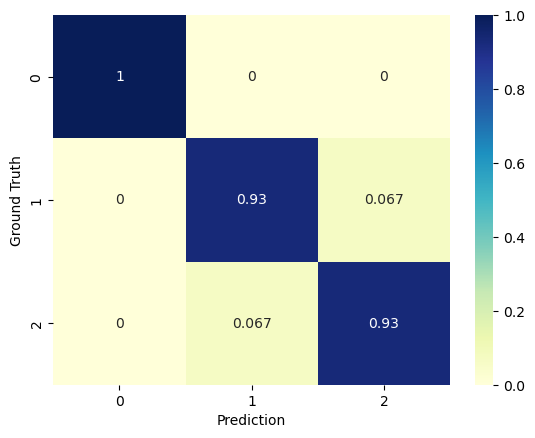

In [16]:
import seaborn as sns
figure = plt.gcf()
ax = figure.add_subplot(111)
sns.heatmap(cm_norm, annot=True, cmap='YlGnBu')
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth')

### Precision-Recall

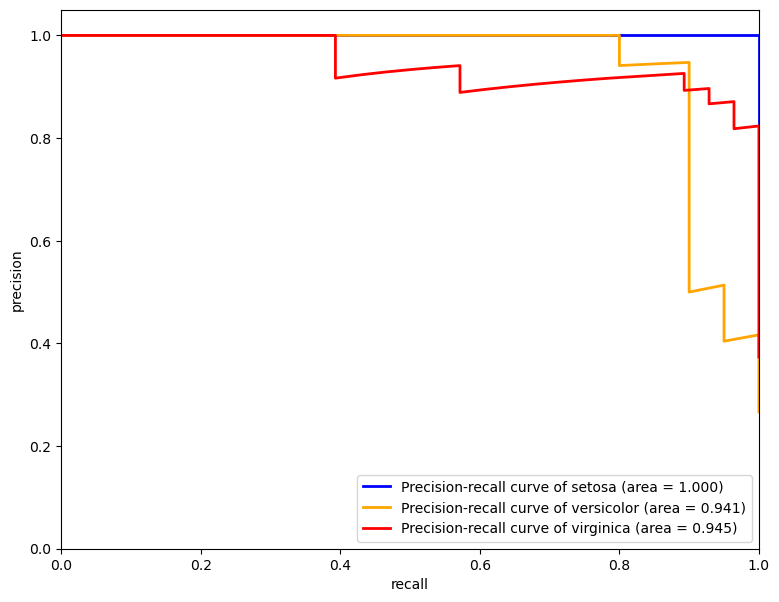

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

colors = ['blue', 'orange', 'red']

iris = load_iris()

X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 500 * n_features)]

#____________________________________________________________________
# training test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)


one_vs_rest = OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma=100, probability=True, random_state=12))
y_score = one_vs_rest.fit(X_train, y_train).decision_function(X_test)
y_true, y_pred = y_test, one_vs_rest.predict(X_test)

precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

#____________________________________________________________________
# Plot Precision-Recall curve for each class
fig = plt.figure(1, figsize=(9, 7))
plt.clf()
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of {0} (area = {1:0.3f})'
                   ''.format(iris.target_names[i], average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc="lower right")
plt.show()
# fig.savefig('ML_0604.png', bbox_inches='tight')
# plt.clf()

In [18]:
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svc = SVC(kernel='rbf', C=1, gamma=1)
clf = svc.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred, digits=3, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      0.933     0.933     0.933        15
   virginica      0.933     0.933     0.933        15

    accuracy                          0.956        45
   macro avg      0.956     0.956     0.956        45
weighted avg      0.956     0.956     0.956        45



### Metrik Regression

In [19]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [20]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

X = data[:,5:6]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

lr = lm.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [23]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

48.20396841106558
4.7069613412271085
2.885121509334839
0.42203569171371


In [24]:
y_train_pred = lr.predict(X_train)

In [25]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))
print(r2_score(y_train, y_train_pred))

41.651020107769185
4.329310287661524
2.860658700530852
0.5089684947687656


### Validation 

In [26]:
iris = load_iris()

X = iris.data
y = iris.target
svc = SVC(kernel='rbf', C=1, gamma=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

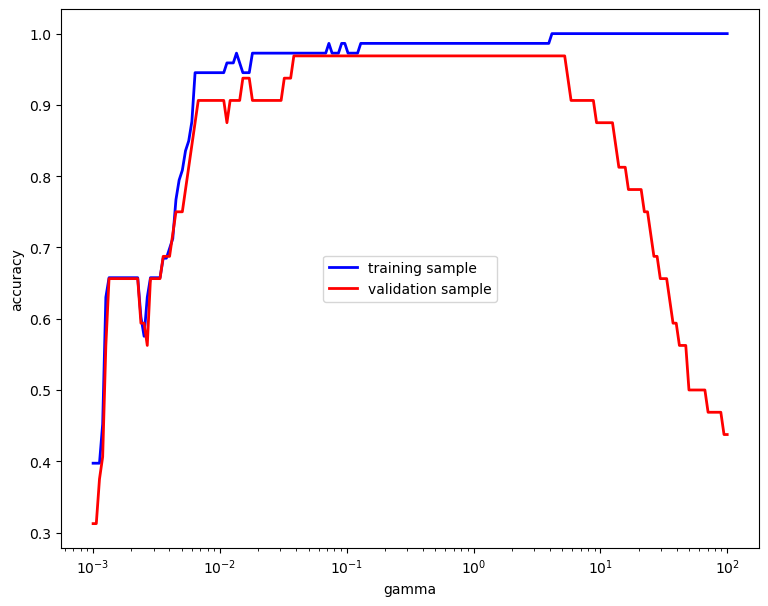

In [27]:
fig = plt.figure(1, figsize=(9, 7))
ax = fig.add_subplot(111)

param_range = np.logspace(-3, 2, 200)
train_scores, val_scores = [], []
for g in param_range:
    svc = SVC(kernel='rbf', C=1, gamma=g)
    clf = svc.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    val_scores.append(clf.score(X_val, y_val))
best_param = param_range[np.argmax(val_scores)]

plt.plot(param_range, train_scores, label="training sample", color="b", lw=2)
plt.plot(param_range, val_scores, label="validation sample", color="r", lw=2)

ax.set_xscale( "log" )
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.axis("tight")
plt.legend(loc='center')

plt.show()
# fig.savefig('ML_0601.png', bbox_inches='tight')
# plt.clf()